In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
main_df = pd.read_csv(r'/creditcard.csv')

#main_df = main_df.drop_duplicates()
#main_df = main_df.dropna()
print (f"Shape of data {main_df.shape}")
main_df.head()

Shape of data (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
from dataprep.eda import create_report
report = create_report(main_df)
report.show_browser()

Computing mean_agg-aggregate-mean_chunk-sub-sum-sum-aggregate-truediv-b2911700eb31f6903f2d53d37ed3815e:   0%|          | 28/7102 [00:11<49:31,  2.38it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [51]:
feature_to_split = 'Class'

# Split the DataFrame into two based on the specified feature
real = main_df[main_df[feature_to_split] == 0]
fraud = main_df[main_df[feature_to_split] == 1]
print(real.shape)
print(fraud.shape)

# Calculate the percentage of total DataFrame for df_1
percentage_df_1 = (len(real) / len(main_df)) * 100
print(percentage_df_1)

# Calculate the percentage of total DataFrame for df_2
percentage_df_2 = (len(fraud) / len(main_df)) * 100
print(percentage_df_2)

(284315, 31)
(492, 31)
99.82725143693798
0.1727485630620034


Here, we split the dataframe into two subsets of fraud and real transactions. By looking at the size, we can see that the dataset is highly imbalanced. Only 492, or 0.17% of the whole dataset, is fraud,.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

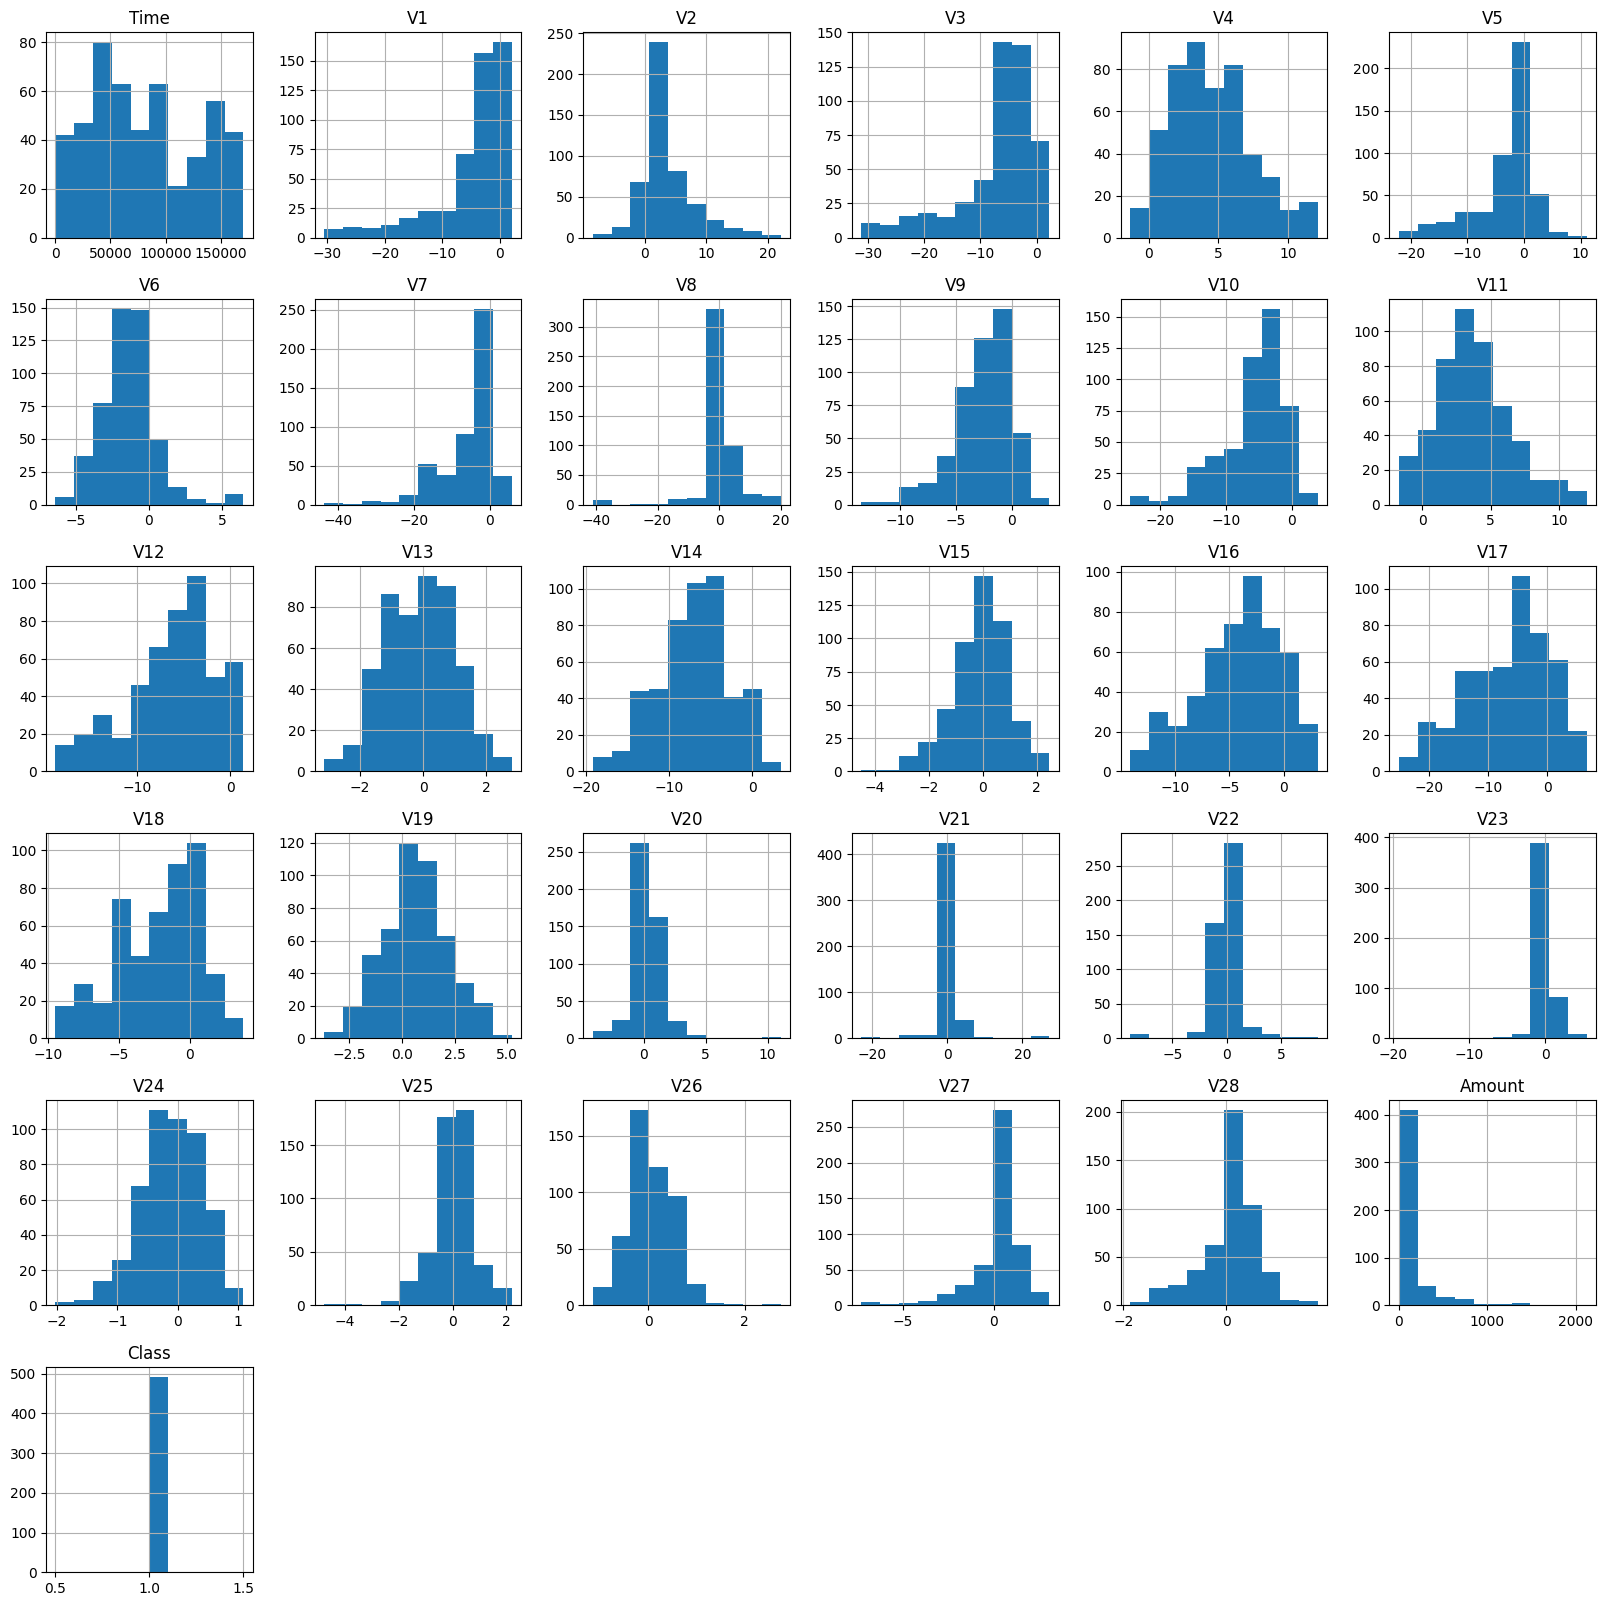

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

fraud.hist(figsize = (20, 20))
plt.show()

These are histograms of the amounts of other features in the dataset; the histograms above are all fraud transactions, and the histograms below are all real transactions.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

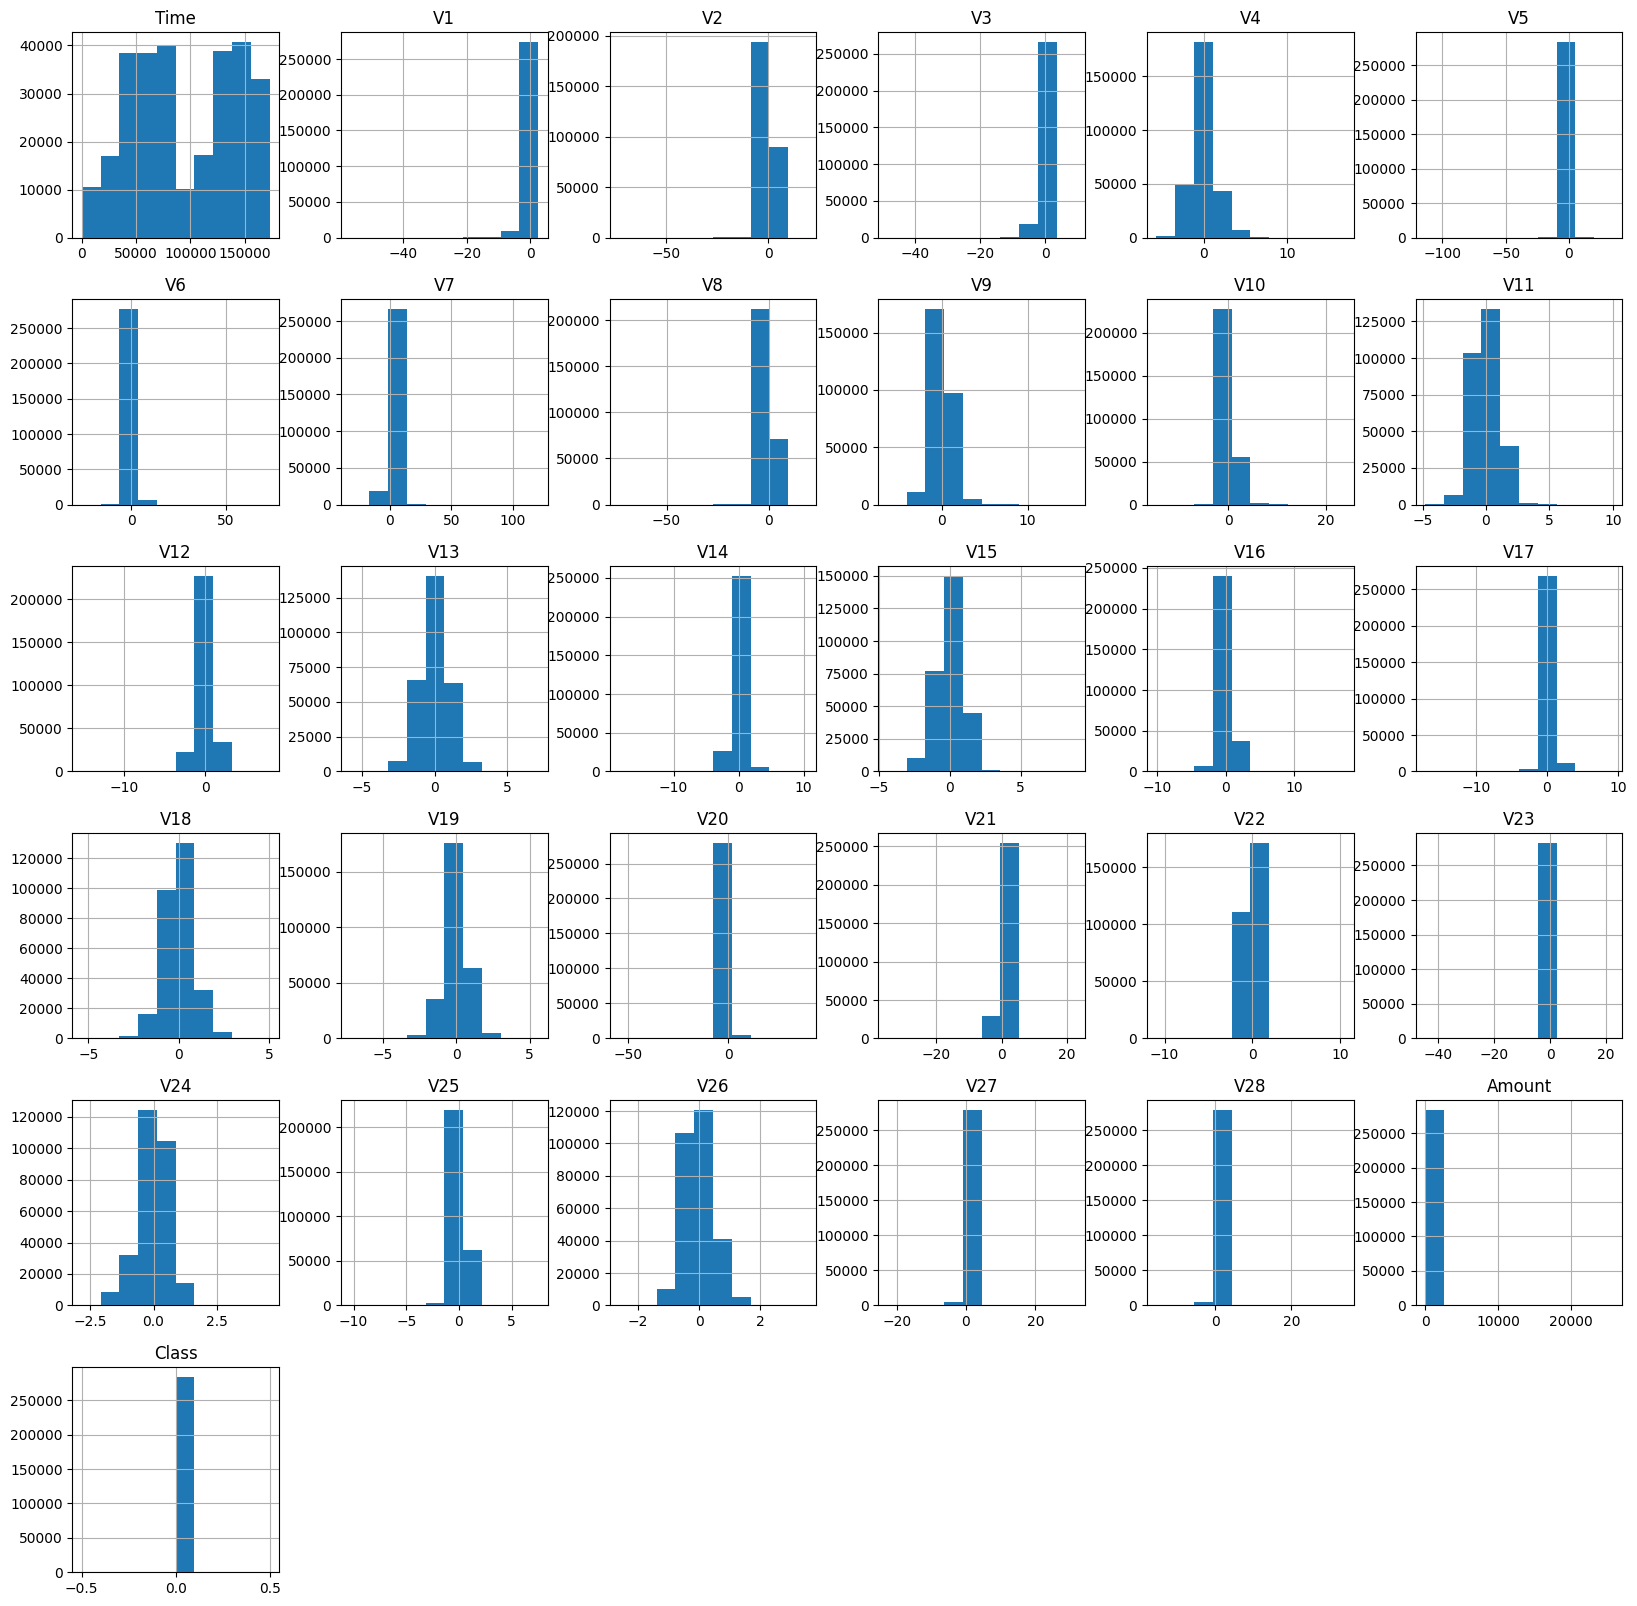

In [44]:
real.hist(figsize = (20, 20))
plt.show()

In [52]:
real = real.sample(frac=1, random_state=42)  # shuffling with random_state
real = real.head(492)
main_df = pd.concat([real, fraud], ignore_index=True)

To make the dataset more balanced, we randomized the set of real transactions, and then selected only 492 of those transactions to concatenate with all the fraud transactions. Now, the amount of transactions of each class are equal.

In [53]:
#separating features and labels
features_df = main_df.drop('Class', axis=1)
labels_df = main_df[['Class']]

In [ ]:
#cleaning by dropping null and duplicates
features_df = features_df.dropna()
features_df = features_df.drop_duplicates()

labels_df = labels_df.dropna()
labels_df = labels_df.drop_duplicates()

In [54]:
from sklearn.preprocessing import StandardScaler
#scaling numerical features
scaler = StandardScaler()
all_columns = features_df.columns

features_df[all_columns] = scaler.fit_transform(features_df[all_columns])
features_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.113614,0.656444,-0.333750,0.462947,-0.480585,0.439336,-0.231518,0.541927,-0.119652,0.487148,...,-0.238162,-0.190443,-0.364464,-0.109814,-0.248843,0.896138,0.825081,-0.125281,-0.012024,-0.453503
1,-0.778566,0.273646,-0.171934,0.716463,-0.487441,0.419604,0.235537,0.560130,-0.031604,0.218698,...,-0.260167,-0.057595,0.497647,-0.067627,0.120820,-0.413036,-0.834735,-0.487386,-0.360542,-0.438074
2,-0.683272,0.347470,-0.561369,0.751563,-1.112290,0.215251,0.425548,0.355340,-0.065901,-0.579990,...,-0.121069,-0.177315,0.103254,-0.153127,-0.747298,-0.506585,-0.008253,0.072974,0.489060,-0.389258
3,0.597744,0.407398,-0.204600,0.411179,-0.713310,0.409453,-0.360754,0.608122,-0.032515,0.479626,...,-0.343815,-0.002941,0.778821,-0.004221,-0.121095,-0.551136,-0.345495,-0.114582,0.013615,-0.199772
4,0.052832,0.753156,-0.392896,0.613957,0.501887,0.388442,0.982748,0.351807,-0.011692,0.835760,...,-0.450797,-0.092796,0.533774,0.180980,1.293603,-0.354022,-0.070913,-0.110766,-0.191291,-0.456932


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#splitting data into training and testing
features = features_df.to_numpy()
labels = labels_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# set k = 5
k = 5

kfold_spliiter = KFold(n_splits=k)

folds_data = []

fold = 1
for train_index, validation_index in kfold_spliiter.split(_x):
    x_train , x_valid = _x[train_index,:],_x[validation_index,:]
    y_train , y_valid = _y[train_index,:] , _y[validation_index,:]
    print (f"Fold {fold} training data shape = {(x_train.shape,y_train.shape)}")
    print (f"Fold {fold} validation data shape = {(x_valid.shape,y_valid.shape)}")
    fold+=1
    folds_data.append((x_train,y_train,x_valid,y_valid))

Fold 1 training data shape = ((708, 30), (708, 1))
Fold 1 validation data shape = ((177, 30), (177, 1))
Fold 2 training data shape = ((708, 30), (708, 1))
Fold 2 validation data shape = ((177, 30), (177, 1))
Fold 3 training data shape = ((708, 30), (708, 1))
Fold 3 validation data shape = ((177, 30), (177, 1))
Fold 4 training data shape = ((708, 30), (708, 1))
Fold 4 validation data shape = ((177, 30), (177, 1))
Fold 5 training data shape = ((708, 30), (708, 1))
Fold 5 validation data shape = ((177, 30), (177, 1))


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=150)
mlp_classifier = MLPClassifier(solver='lbfgs', max_iter=150)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

classifiers = {"Logistic Regression Classifier":lr_classifier,
              "MLP Classifier":mlp_classifier,
              "DecisionTreeClassifier":dt_classifier,
              "RandomForestClassifier":rf_classifier}

print (f"These are the 4 classifiers we will use: {all_models.keys()}")

These are the 4 classifiers we will use: dict_keys(['Logistic Regression Classifier', 'MLP Classifier', 'DecisionTreeClassifier', 'RandomForestClassifier'])


In [57]:
best_validation_accuracy = 0
best_model_name = ""
best_model = None

# Iterate over all models
for model_name in all_models.keys():

    model = all_models[model_name]

    # storing accuracies
    train_acc_for_all_folds = []
    valid_acc_for_all_folds = []

    for i, fold in enumerate(folds_data):
        x_train, y_train, x_valid, y_valid = fold

        _ = model.fit(x_train,y_train.flatten())

        y_pred_train = model.predict(x_train)

        y_pred_valid = model.predict(x_valid)

        train_acc = accuracy_score(y_pred_train , y_train)

        # store accuracy
        train_acc_for_all_folds.append(train_acc)

        valid_acc = accuracy_score(y_pred_valid , y_valid.flatten())

        valid_acc_for_all_folds.append(valid_acc)

    #average training accuracy across k folds
    avg_training_acc = sum(train_acc_for_all_folds)/k

    print (f"The avg training accuracy for this model, {model_name} = {avg_training_acc}")

    #average validation accuracy across k folds
    avg_validation_acc = sum(valid_acc_for_all_folds)/k

    print (f"The avg validation accuracy for this model, {model_name} = {avg_validation_acc}")

    # Select best model based on average validation accuracy
    if avg_validation_acc > best_validation_accuracy:
        best_validation_accuracy = avg_validation_acc
        best_model_name = model_name
        best_model = model
    print (f"-----------------------------------")

print (f"Our best model is {best_model_name} with a validation accuracy of {best_validation_accuracy}")

The avg training accuracy for this model, Logistic Regression Classifier = 0.9607344632768362
The avg validation accuracy for this model, Logistic Regression Classifier = 0.9491525423728813
-----------------------------------
The avg training accuracy for this model, MLP Classifier = 1.0
The avg validation accuracy for this model, MLP Classifier = 0.927683615819209
-----------------------------------
The avg training accuracy for this model, DecisionTreeClassifier = 1.0
The avg validation accuracy for this model, DecisionTreeClassifier = 0.9265536723163841
-----------------------------------
The avg training accuracy for this model, RandomForestClassifier = 1.0
The avg validation accuracy for this model, RandomForestClassifier = 0.9457627118644067
-----------------------------------
Our best model is Logistic Regression Classifier with a validation accuracy of 0.9491525423728813


After computing the accuracies for 4 classifiers, we found that Logistic Regression provided the highest accuracy.

In [58]:
from sklearn.model_selection import cross_val_score
import numpy

best_model = LogisticRegression()

feature_names = features_df.columns

cv_scores = cross_val_score(best_model,_x,_y.flatten(), cv=k, n_jobs=4)
average_cv_score_with_all_features = cv_scores.mean()

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # dropping one feature at a time to see how it impacts accuracy
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")
    x_ablated = numpy.delete(_x,i,axis=1) # axis = 1 means columns
    cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy = {average_cv_score}")
    accuracy_drop_log[feature_name] = average_cv_score_with_all_features-average_cv_score

Removing feature Time
Mean cross validation accuracy = 0.9480225988700566
Removing feature V1
Mean cross validation accuracy = 0.9480225988700566
Removing feature V2
Mean cross validation accuracy = 0.9480225988700566
Removing feature V3
Mean cross validation accuracy = 0.9514124293785311
Removing feature V4
Mean cross validation accuracy = 0.944632768361582
Removing feature V5
Mean cross validation accuracy = 0.9491525423728813
Removing feature V6
Mean cross validation accuracy = 0.9491525423728813
Removing feature V7
Mean cross validation accuracy = 0.9480225988700566
Removing feature V8
Mean cross validation accuracy = 0.9468926553672317
Removing feature V9
Mean cross validation accuracy = 0.951412429378531
Removing feature V10
Mean cross validation accuracy = 0.945762711864407
Removing feature V11
Mean cross validation accuracy = 0.9525423728813559
Removing feature V12
Mean cross validation accuracy = 0.9468926553672317
Removing feature V13
Mean cross validation accuracy = 0.954802

In [59]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]

    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of Logistic Regression Classifier)
**************************************
Feature 1.V4, drop in acc 0.003389830508474523
Feature 2.V14, drop in acc 0.003389830508474523
Feature 3.V20, drop in acc 0.00225988700564983
Feature 4.V10, drop in acc 0.002259887005649608
Feature 5.V8, drop in acc 0.001129943502824915
Feature 6.V12, drop in acc 0.001129943502824915
Feature 7.V28, drop in acc 0.001129943502824915
Feature 8.V26, drop in acc 2.220446049250313e-16
Feature 9.Time, drop in acc 0.0
Feature 10.V1, drop in acc 0.0
Feature 11.V2, drop in acc 0.0
Feature 12.V7, drop in acc 0.0
Feature 13.V16, drop in acc 0.0
Feature 14.V17, drop in acc 0.0
Feature 15.V21, drop in acc 0.0
Feature 16.V24, drop in acc 0.0
Feature 17.V5, drop in acc -0.001129943502824693
Feature 18.V6, drop in acc -0.001129943502824693
Feature 19.V15, drop in acc -0.001129943502824693
Feature 20.V18, drop in acc -0.001129943502824693
Featu

Upon conducting feature ablation, we found that feature V4 and feature V14 had an especially high impact on accuracy, as removing them both caused a drop above 0.0033. On the other hand, some features, such as Amount or V5, actually caused an increase an accuracy when they were removed. From this list, we can deduct that the first 8 features in this ranking contribute most to the accuracy of the model, and are vital to keep in the model upon future work.